# COVID Analysis - Intro to Pandas Data Analysis

This uses a county level timeseries dataset provided by:  https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/ 

You can use curl to fetch the 2 files or download manually.

- curl https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv -o usa-confirmed.csv   
- curl https://static.usafacts.org/public/data/covid-19/covid_deaths_usafacts.csv -o usa-deaths.csv

Global data is best taken from John Hopkins via Github:  https://github.com/CSSEGISandData/COVID-19.git 
- curl https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv -o confirmed_ts.csv


## Loading and displaying USAFacts Regional data

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

#dfc = pd.read_csv(StringIO(requests.get('https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv').text))
dfc = pd.read_csv(StringIO(requests.get('https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv').text))
dfc.insert(0,'countyFIPS',dfc[dfc.columns[0]])  # hack when there is a bogus bom ffef header
display('dfc shapes (col,rows): ' + str(dfc.shape))
display('first 3 (head) of confirmed cases',dfc.head(3))

'dfc shapes (col,rows): (3197, 73)'

'first 3 (head) of confirmed cases'

,ï»¿countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,0,0,0,1,4,6,6,6,6,7.0
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,2,3,3,4,4,5,5,10,15,18.0


## Basic Slicing of Data

In [60]:
# slicing down cols and rows
display('last 5 cols', dfc.iloc[:,-5:].head(3))
display('choose cols by name', dfc.loc[:,['County Name','State','3/18/2020']].head(3))
display('last 3 rows', dfc.iloc[-3:,2:5])


'last 5 cols'

,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
0,0,0,0,0,0.0
1,6,6,6,6,7.0
2,5,5,10,15,18.0


'choose cols by name'

,County Name,State,3/18/2020
0,Statewide Unallocated,AL,0
1,Autauga County,AL,0
2,Baldwin County,AL,1


'last 3 rows'

,State,stateFIPS,1/22/2020
3194,WY,56,0
3195,WY,56,0
3196,WY,56,0


## Filtering, Sorting and Joining -- Select Counties with the highest Counts

In [61]:
# join first 4 cols + last 10 columns, filter on > 500 cases in latest date, sort by desc, # as of 3/27 now it is split into buroughs
# filter = dfc['State']=='CA'
# dfc_ST = dfc[filter]   # filter just NY rows
dfc_ST = dfc
dfc_ST = pd.concat([dfc_ST.iloc[:,1:5], dfc_ST.iloc[:,-10:]], axis=1) 
dfc_ST = dfc_ST[dfc_ST[dfc_ST.columns[-1]] > 100].sort_values(by=[dfc_ST.columns[-1]], ascending=False)
display('X counties w/ > 100 cases', dfc_ST)

'X counties w/ > 100 cases'

,County Name,State,stateFIPS,1/22/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
1903,Queens County,NY,36,0,2254,2715,3621,4364,6420,7362,8214,9831,10737,12756.0
1886,Kings County,NY,36,0,2484,2857,3494,4237,5232,6095,6750,8129,8887,10171.0
1922,Westchester County,NY,36,0,1385,1873,2894,3891,4691,5944,7187,7875,8519,9329.0
1892,Nassau County,NY,36,0,1234,1900,2442,2869,3285,3914,4657,5537,6445,7344.0
1865,Bronx County,NY,36,0,1071,1411,1829,2328,3542,4243,4655,5752,6250,6925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,Saratoga County,NY,36,0,24,41,53,60,64,73,82,82,102,105.0
3031,Skagit County,WA,53,0,28,33,45,48,63,78,91,97,101,101.0
3005,Benton County,WA,53,0,7,7,7,10,10,19,42,56,101,101.0
2111,Hamilton County,OH,39,0,8,19,26,38,48,53,63,71,85,101.0


## Plotting growth rates by  Counties

Pandas has builtin matploblit integration (DataFrame.plot*) which renders natively in notebooks.  Very slick!

,1/22/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
County Name,,,,,,,,,,,
Queens County,0,2254,2715,3621,4364,6420,7362,8214,9831,10737,12756.0
Kings County,0,2484,2857,3494,4237,5232,6095,6750,8129,8887,10171.0
Westchester County,0,1385,1873,2894,3891,4691,5944,7187,7875,8519,9329.0
Nassau County,0,1234,1900,2442,2869,3285,3914,4657,5537,6445,7344.0
Bronx County,0,1071,1411,1829,2328,3542,4243,4655,5752,6250,6925.0


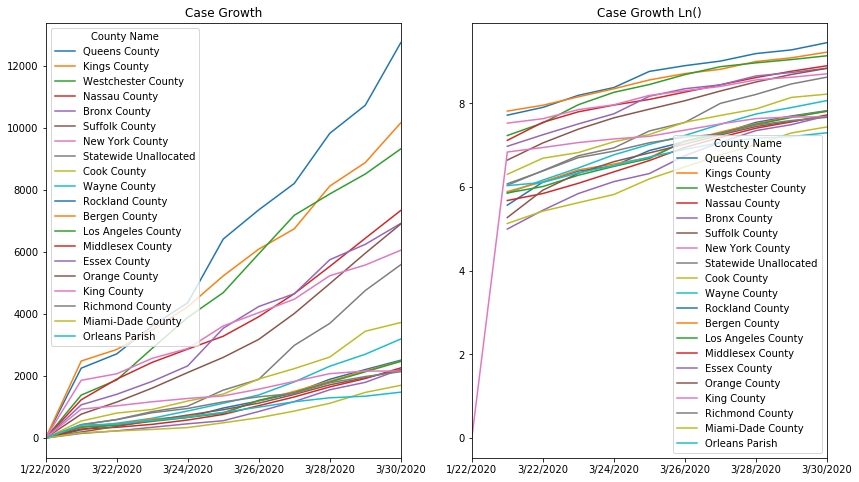

In [62]:
import numpy as np
fig, axs = plt.subplots(1,2)  # 1 x 2 side by side

dfc_sum = dfc_ST.drop(columns=['State','stateFIPS']).groupby(['County Name']).sum().sort_values(by=[dfc.columns[-1]], ascending=False).head(20)
display(dfc_sum.head())

dfc_sum.transpose().plot(figsize=(14,8),title='Case Growth',ax=axs[0])
dfc_sum.transpose().apply(np.log).plot(figsize=(14,8),title='Case Growth Ln()',ax=axs[1])


## Plotting growth rates by State

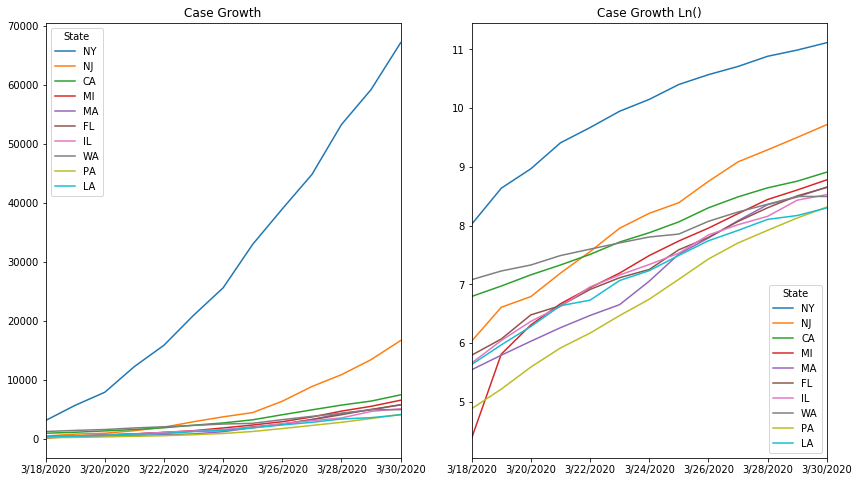

In [63]:
fig, axs = plt.subplots(1,2)

dfc_sum = dfc[dfc[dfc.columns[-1]] > 500]
dfc_sum = dfc.groupby(['State']).sum().loc[:, dfc.columns[-13:]].sort_values(by=[dfc.columns[-1]], ascending=False).head(10)

dfc_sum.transpose().plot(figsize=(14,8),title='Case Growth',ax=axs[0])
dfc_sum.transpose().apply(np.log).plot(figsize=(14,8),title='Case Growth Ln()',ax=axs[1])


## Daily Change rates and Plotting

,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
State,,,,,,,
NJ,0.0,0.197823,0.438210,0.393935,0.227875,0.235327,0.242791
PA,0.0,0.404230,0.411715,0.314760,0.239856,0.233818,0.204539
MI,0.0,0.281564,0.244551,0.280560,0.271882,0.175269,0.189021
MA,0.0,0.585998,0.315531,0.342171,0.313889,0.139535,0.185735
CA,0.0,0.202575,0.270466,0.205204,0.166153,0.120085,0.166877


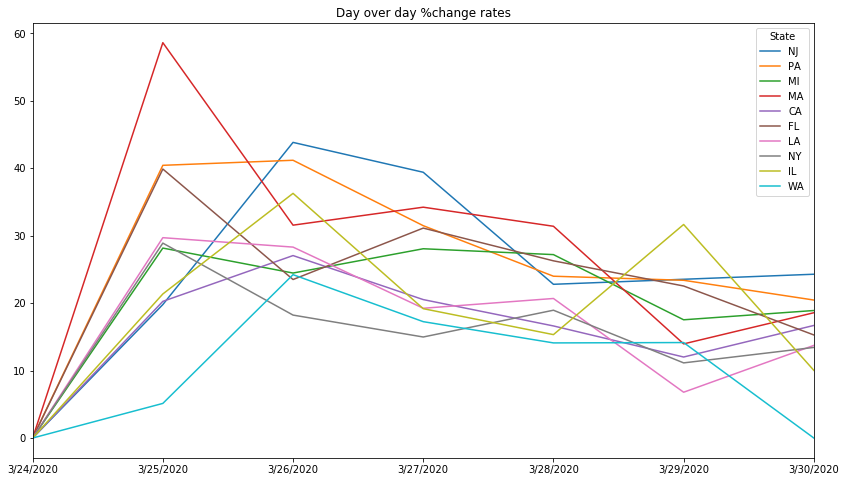

In [64]:
# show Day over day change rates, look in detail at last 7 days

df_sum_7 = dfc_sum.transpose().tail(7).transpose()
dfc_dod = df_sum_7.pct_change(axis=1).fillna(0).sort_values([df_sum_7.columns[-1]], ascending=False).head(10)
display(dfc_dod.head())
dfc_dod.transpose().mul(100).plot(figsize=(14,8),title='Day over day %change rates')


I'm not sure if this tells us anything -- rate of change is 10-50% day over day..  we can try taking a rolling average

,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
State,,,,,,,
NY,25578.0,32968.0,38976.0,44813.0,53303.0,59240.0,67195.0
NJ,3675.0,4402.0,6331.0,8825.0,10836.0,13386.0,16636.0
CA,2641.0,3176.0,4035.0,4863.0,5671.0,6352.0,7412.0
MI,1790.0,2294.0,2855.0,3656.0,4650.0,5465.0,6498.0
MA,1157.0,1835.0,2414.0,3240.0,4257.0,4851.0,5752.0


,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
State,,,,,,,
NY,NaN,29273.0,35972.0,41894.0,49058.0,56272.0,63218.0
NJ,NaN,4038.0,5366.0,7578.0,9830.0,12111.0,15011.0
CA,NaN,2908.0,3606.0,4449.0,5267.0,6012.0,6882.0
MI,NaN,2042.0,2574.0,3256.0,4153.0,5058.0,5982.0
MA,NaN,1496.0,2124.0,2827.0,3748.0,4554.0,5302.0


,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020
State,,,,,,,
NJ,0.0,0.0,0.328876,0.412225,0.297176,0.232045,0.239452
PA,0.0,0.0,0.408602,0.354615,0.272541,0.236715,0.217448
IL,0.0,0.0,0.295294,0.264305,0.170618,0.240871,0.193373
FL,0.0,0.0,0.302834,0.276846,0.283889,0.241846,0.185400
MI,0.0,0.0,0.260529,0.264957,0.275491,0.217915,0.182681


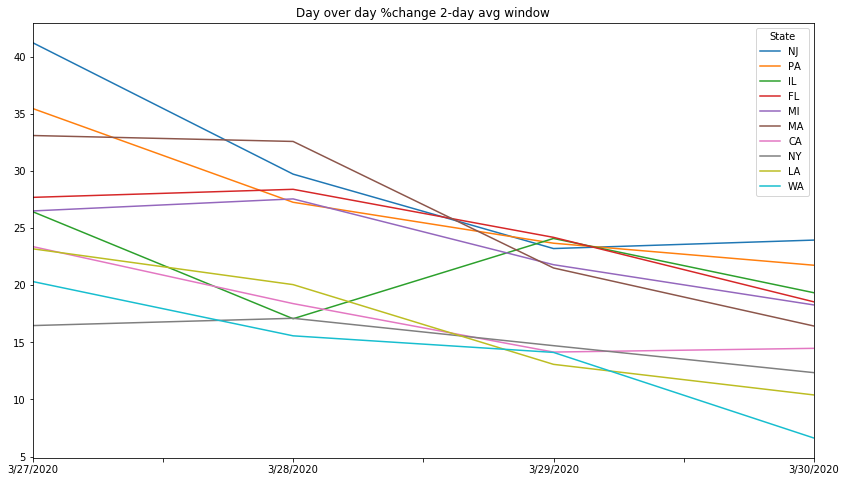

In [65]:
display(df_sum_7.head())
dfc_dod = df_sum_7.rolling(2,axis=1,center=False).mean().round()
display(dfc_dod.head())
dfc_dod = dfc_dod.pct_change(axis=1).fillna(0).sort_values([dfc_dod.columns[-1]], ascending=False)
display(dfc_dod.head())
dfc_dod[dfc_dod.columns[-4:]].head(10).transpose().mul(100).plot(figsize=(14,8),title='Day over day %change 2-day avg window')


Not much different taking a 2-day rolling average - 20-50% increase is the recent range

# Comparing vs S&P 500 datasets -- available from Yahoooo

Yahoo data is easy to get via https://finance.yahoo.com - or use this direct link:  
-  https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history  

Note this is hardcoded to Feb 18 to Present (currently about 35 days)

In [66]:
dfc_st = dfc.copy()
dfc_st = dfc_st.drop(columns=['stateFIPS','countyFIPS','County Name']).groupby(['State']).sum().sort_values(dfc_st.columns[-1], ascending=False)
dfc_st = dfc_st.transpose().tail(40)  # last 40 days ?
dfc_st.index = pd.to_datetime(dfc_st.index) 

sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_st, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['USA'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df.tail()

KeyError: "['countyFIPS'] not found in axis"

In [ ]:
#plotting overlays fun 

fig,ax1 = plt.subplots(figsize=(14, 8)) 
data = merged_df[['Low','Close','Close','High']]

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by State (Ln)')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend()

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.set_ylabel('National Count ... ', color='xkcd:red')  # we already handled the x-label with ax1
ax3.plot(merged_df.index, merged_df['USA'], color='xkcd:red', linestyle=':')
plt.title('S&P vs COVID (US State and National)')
plt.show()

# Global Analysis 

Do the same using Global data from John Hopkins University

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [ ]:
dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose().tail(40)  # last 40 days ?
dfc_g.index = pd.to_datetime(dfc_g.index) 

sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_g, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['Global'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df[['Close','Open','High','Low','US','Iran','Italy','Spain','China','Japan','Global']].tail()

In [ ]:
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('S&P vs COVID Global')

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by Country')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.set_ylabel('Global Count --- ', color='xkcd:red')  
ax3.plot(merged_df.index, merged_df['Global'], color='xkcd:red', linestyle=':')
plt.show()


## Countries experiencing high counts recently..

I'm curious where else the virus is catching fire...


In [ ]:
dfc_g2 = dfc_g.transpose()
display('top 15 countries', dfc_g2.sort_values(by=[dfc_g2.columns[-1]], ascending=False).head(15).iloc[:,-15:])

## Random analysis of various countries

In [ ]:
# ad hoc overlays
fig, axs = plt.subplots(1,3, figsize=(14, 4))

pctline = dfc_g2[dfc_g2.index.isin(['Italy','US','Spain'])].pct_change(axis=1).transpose().tail(30).plot(ax=axs[0], title='PCT% Change')
chgline = dfc_g2[dfc_g2.index.isin(['Italy','US','Spain'])].diff(axis=1).transpose().tail(30).plot(ax=axs[1], title='Case Change')
actline = dfc_g2[dfc_g2.index.isin(['Italy','US','Spain'])].transpose().tail(30).plot(ax=axs[2], title='Cases Total')
plt.show()

In [ ]:
# global rate
dfc_gdiff = dfc_g.transpose().sum().diff()

dfc_gdiff.tail(30).plot(figsize=(8,6),title='global daily rate')

In [ ]:
# just the top countries by growth % (how do i trunc these silly timestamp headers...)
dfc_g3 = dfc_g2.diff(axis=1)
dfc_g3.columns = pd.to_datetime(dfc_g3.columns)
dfc_g3p = dfc_g2.pct_change(axis=1).mul(100).round()
dfc_g3p.columns = pd.to_datetime(dfc_g3p.columns)

dfc_merge = pd.merge(left=dfc_g2, right=dfc_g3p, left_index=True, right_index=True, suffixes=('',' %chg'))
# weird it goes to timestamp now
dfc_merge = dfc_merge.reindex(sorted(dfc_merge.columns), axis=1)
dfc_merge = dfc_merge[dfc_merge[dfc_merge.columns[-2]] > 100]

display('top 20 growth countries, > 100 cases', 
        dfc_merge.sort_values(by=dfc_merge.columns[-1], ascending=False).head(20).iloc[:,-6:])


In [ ]:
# rolling 3 day average highs
fig, axs = plt.subplots(1,2)

df_roll = dfc_g3.rolling(3,axis=1,center=False).mean().round()
df_roll = df_roll.sort_values(by=[df_roll.columns[-1]], ascending=False).head(15)
display(df_roll.iloc[:,-10:])
df_roll.iloc[:,-28:].transpose().plot(figsize=(14,8),title='rolling 3 day, top 20',ax=axs[0])
df_roll.iloc[:,-28:].transpose().apply(np.log).plot(figsize=(14,8),title='rolling 3 day, top 20 (ln)',ax=axs[1])



# Using PyPlot GeoJSON and ChoroPleth maps

https://plot.ly/python/choropleth-maps/

Install
- pyplot
- pyplot-orca


In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = dfc[['countyFIPS','County Name','State']].copy()
df['count'] = dfc[dfc.columns[-1]]
df['County, ST'] = df['County Name']+', '+df['State']
display(df.shape)

# make FIPS 5 char to match geojson data
df['countyFIPSstr'] = df['countyFIPS'].apply(lambda x: str(x) if x > 9999 else '0'+str(x)) 
df['countLog'] = df['count'].apply(lambda x: np.log(x) if x != 0 else 0)
df['label'] = df['County, ST'] + ': ' + df['count'].astype(str)
df.head()


In [ ]:
import plotly.express as px
fig = px.choropleth(df, geojson=counties, 
                           locations='countyFIPSstr', 
                           color='countLog',
                           color_continuous_scale="OrRd",
                           range_color=(0,10),
                           scope="usa",
                           hover_name='label',
                           labels={'covis':'covis count'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
# for github and nbviewer rendering
fig.show("svg")

# Global Heatmap (Using Shape Files)


I wanted to map by country, but need to find a country equivalent of a FIPS code (or match by country name to a map file).

Another way is to use GPS (Long/Lat) geocordinates and a Map (shape file).   However my global data is sometimes clumped into one lat/long for some countrues like Japan and US, and detailed locations in places like France.

In [ ]:
# country shape file https://hub.arcgis.com/datasets/UIA::uia-latitude-longitude-graticules-and-world-countries-boundaries?geometry=-144.961%2C-72.317%2C-179.414%2C79.981&layer=1
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

gmap = gpd.read_file('maps/Countries_WGS84.shp')

# remove hi/ak for now
dfc_geo = dfc_graw.drop(columns=['Province/State'])
dfc_geo['last'] = dfc_geo[dfc_geo.columns[-1]]
dfc_geo = dfc_geo[dfc_geo['Country/Region'].isin(['US','Italy','Japan','France'])]
display(dfc_geo)


geometry = [Point(xy) for xy in zip(dfc_geo["Long"],dfc_geo["Lat"]) ] 
geo_df = gpd.GeoDataFrame(dfc_geo,crs={"init": "EPSG:7030"},geometry=geometry)
geo_df = geo_df[['Country/Region','last','geometry']]

fig, ax = plt.subplots(figsize=(25,25))
gmap.plot(ax=ax, alpha=0.5, color='grey')

#geo_df.plot(ax=ax, markersize=20, cmap='Reds', label='cases')
geo_df.plot(ax=ax, markersize=dfc_geo['last'].div(100), color='red', label='cases')   # size on last
